<a href="https://colab.research.google.com/github/vvrgit/Udemy-Oprimization-Basics/blob/main/MBGD_Case_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

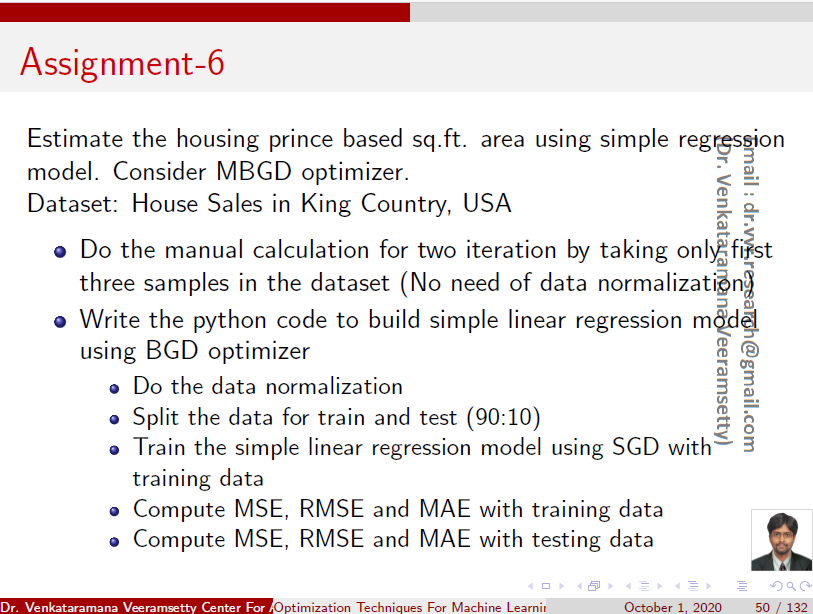

In [ ]:
import pandas as pd
import random

In [ ]:
data=pd.read_csv("/content/Housing.csv")
data.head()

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


In [ ]:
price_min=data["price"].min()
price_max=data["price"].max()
area_min=data["area"].min()
area_max=data["area"].max()

In [ ]:
data.describe()

,price,area
count,5.450000e+02,545.000000
mean,4.766729e+06,5150.541284
std,1.870440e+06,2170.141023
min,1.750000e+06,1650.000000
25%,3.430000e+06,3600.000000
50%,4.340000e+06,4600.000000
75%,5.740000e+06,6360.000000
max,1.330000e+07,16200.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'price' and 'area' columns
data[['price', 'area']] = scaler.fit_transform(data[['price', 'area']])

print("Normalized Data:")
display(data.head())

Normalized Data:


,price,area
0,1.000000,0.396564
1,0.909091,0.502405
2,0.909091,0.571134
3,0.906061,0.402062
4,0.836364,0.396564


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.area, data.price, test_size=0.2, random_state=42)

In [ ]:
batch_size = 32 # Define your desired batch size
num_batches = X_train.shape[0] // batch_size
X_train_batches = np.array_split(X_train, num_batches)
y_train_batches = np.array_split(y_train, num_batches)

In [ ]:
eta=0.01
epochs=1000
m=random.uniform(-1,1)
c=random.uniform(-1,1)

In [ ]:
for iter in range(epochs):
  for batch in range(num_batches):
    Gm=0
    Gc=0
    for sample in range(X_train_batches[batch].shape[0]):
      Gm=Gm+(y_train_batches[batch].iloc[sample]-m*X_train_batches[batch].iloc[sample]-c)*X_train_batches[batch].iloc[sample]
      Gc=Gc+(y_train_batches[batch].iloc[sample]-m*X_train_batches[batch].iloc[sample]-c)
    gm=-Gm/X_train_batches[batch].shape[0]
    gc=-Gc/X_train_batches[batch].shape[0]
    delm=-eta*gm
    delc=-eta*gc
    m=m+delm
    c=c+delc
print("m=",m)
print("c=",c)

m= 0.5124751825067018
c= 0.13305939510409043


In [ ]:
#training MSE
y_train_pred=m*X_train+c
mse=((y_train-y_train_pred)**2).mean()
print("Training MSE:",mse)

Training MSE: 0.016540229591874556


In [ ]:
#Testing MSE
y_test_pred=m*X_test+c
mse=((y_test-y_test_pred)**2).mean()
print("Testing MSE:",mse)

Testing MSE: 0.027776025601777322


In [ ]:
Area=input("Enter Area of the house")
Area=float(Area)
Area=(Area-area_min)/(area_max-area_min)
m=0.5
c=0.1
Price=m*Area+c
Price=Price*(price_max-price_min)+price_min
print("House Price=",Price)

Enter Area of the house3000
House Price= 3440824.7422680412
